In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import classification_report

In [19]:
(train_data, validation_data, test_data) = tfds.load('emnist/byclass',
                                          split=['train[:80%]','train[80%:]', 'test'],
                                          as_supervised=True)

In [20]:
def normalize_image(image, label):
  image = tf.cast(image, tf.float32)
  # Normalize the pixel values
  image = image / 255.0
  return image, label

In [21]:
def tranpose_image(image, label):
  tf_image = tf.transpose(image, (1,0,2))
  return tf_image, label

In [22]:
train_data = train_data.map(normalize_image).map(tranpose_image)
validation_data = validation_data.map(normalize_image).map(tranpose_image)
test_data = test_data.map(normalize_image).map(tranpose_image)

In [23]:
def build_model():
  model = tf.keras.Sequential()

  model.add(
      tf.keras.layers.Input(shape=(28,28,1))
  )

  model.add(
      tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')
  )
  model.add(
      tf.keras.layers.MaxPool2D(pool_size=(2,2))
  )

  model.add(
      tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')
  )
  model.add(
      tf.keras.layers.MaxPool2D(pool_size=(2,2))
  )

  model.add(
      tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu')
  )
  model.add(
      tf.keras.layers.Dropout(rate=0.5)
  )

  # model.add(
  #     tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu')
  # )
  # model.add(
  #     tf.keras.layers.Dropout(rate=0.5)
  # )

  model.add(
      tf.keras.layers.Flatten()
  )
  model.add(
      tf.keras.layers.Dense(units=256, activation='relu')
  )
  model.add(
      tf.keras.layers.Dense(units=128, activation='relu')
  )
  model.add(
      tf.keras.layers.Dense(units=62, activation='softmax')
  )

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  return model

model = build_model()

In [24]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 256)         147712    
                                                                 
 dropout_4 (Dropout)         (None, 3, 3, 256)        

In [25]:
es = tf.keras.callbacks.EarlyStopping(patience=7, restore_best_weights=True)

train_batches = train_data.batch(64)
validation_batches = validation_data.batch(64)

In [26]:
# Training Epochs
Epochs = 30


# Train the Model
hist = model.fit(train_batches,
                 epochs= Epochs,
                 validation_data= validation_batches,
                 verbose=2,
                 callbacks=[es]
                 )

Epoch 1/30
8725/8725 - 101s - loss: 0.7650 - accuracy: 0.7628 - val_loss: 0.4680 - val_accuracy: 0.8368 - 101s/epoch - 12ms/step
Epoch 2/30
8725/8725 - 102s - loss: 0.4674 - accuracy: 0.8353 - val_loss: 0.4160 - val_accuracy: 0.8500 - 102s/epoch - 12ms/step
Epoch 3/30
8725/8725 - 107s - loss: 0.4268 - accuracy: 0.8463 - val_loss: 0.3934 - val_accuracy: 0.8568 - 107s/epoch - 12ms/step
Epoch 4/30
8725/8725 - 103s - loss: 0.4061 - accuracy: 0.8522 - val_loss: 0.3779 - val_accuracy: 0.8608 - 103s/epoch - 12ms/step
Epoch 5/30
8725/8725 - 100s - loss: 0.3906 - accuracy: 0.8565 - val_loss: 0.3698 - val_accuracy: 0.8638 - 100s/epoch - 11ms/step
Epoch 6/30
8725/8725 - 98s - loss: 0.3811 - accuracy: 0.8593 - val_loss: 0.3633 - val_accuracy: 0.8649 - 98s/epoch - 11ms/step
Epoch 7/30
8725/8725 - 99s - loss: 0.3724 - accuracy: 0.8614 - val_loss: 0.3567 - val_accuracy: 0.8676 - 99s/epoch - 11ms/step
Epoch 8/30
8725/8725 - 103s - loss: 0.3653 - accuracy: 0.8636 - val_loss: 0.3543 - val_accuracy: 0.86

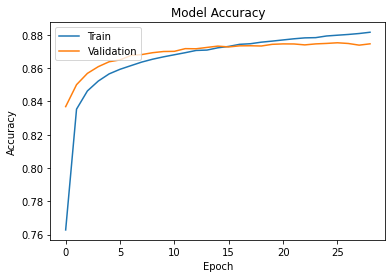

In [27]:
# Plotting model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

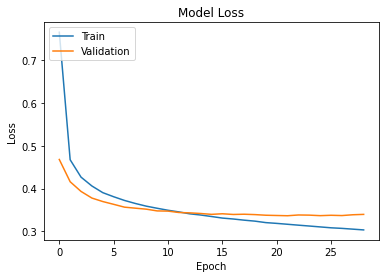

In [28]:
# Plotting model loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
model.save('recognizer.h5')

## Single prediction

In [1]:
word_dict = {}

# Digit characters
for i in range(0, 10):
    word_dict[i] = chr(48 + i)

# Uppercase characters
for i in range(10, 36):
    word_dict[i] = chr(65-10 + i) # minus 10 because we have 10 digits already

# Lowercase characters
for i in range(36, 62):
    word_dict[i] = chr(97-10-26 + i) # m

In [ ]:
word_dict

In [ ]:
# model = tf.keras.models.load_model("recognizer_new.h5")

In [ ]:
# dummy code
# import cv2

# img = cv2.imread("model_input.jpg", cv2.IMREAD_GRAYSCALE)
# edged = cv2.Canny(img, 10, 250)
# contours, _ = cv2.findContours(
#           edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
#       )
# x, y, w, h = cv2.boundingRect(contours[0])
# img_crop = img[y : y + h, x : x + w]
# img_final = cv2.resize(img_crop, (28, 28))

In [ ]:
# img.shape

(28, 28)

In [ ]:
# img_final = tf.transpose(img_final).numpy()

In [ ]:
# from google.colab.patches import cv2_imshow

In [ ]:
# cv2_imshow(img_final)

In [ ]:
# img_final = img_final/255

In [ ]:
# img_final = img_final.reshape(1,28,28,1)

In [ ]:
# word_dict[np.argmax(model.predict(img_final), axis=1)[0]]

1/1 [==============================] - 0s 20ms/step


'3'

## Classification Report

In [30]:
test_batch = test_data.batch(64)
y_pred = model.predict(test_batch)
y_pred = np.argmax(y_pred, axis=1)

# True Labels for Test Data
y_test = []
for _, label in test_batch:
  for vals in label.numpy():
    y_test.append(vals)

1818/1818 [==============================] - 15s 8ms/step


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76      5778
           1       0.68      0.93      0.79      6330
           2       0.97      0.97      0.97      5869
           3       0.99      1.00      0.99      5969
           4       0.98      0.98      0.98      5619
           5       0.96      0.95      0.95      5190
           6       0.98      0.98      0.98      5705
           7       0.99      1.00      0.99      6139
           8       0.98      0.99      0.99      5633
           9       0.93      0.98      0.96      5686
          10       0.94      0.98      0.96      1062
          11       0.93      0.96      0.94       648
          12       0.79      0.94      0.85      1739
          13       0.93      0.91      0.92       779
          14       0.97      0.98      0.97       851
          15       0.79      0.96      0.86      1440
          16       0.89      0.93      0.91       447
          17       0.92    

In [32]:
word_dict = {}

# Digit characters
for i in range(0, 10):
    word_dict[str(i)] = chr(48 + i)

# Uppercase characters
for i in range(10, 36):
    word_dict[str(i)] = chr(65-10 + i) # minus 10 because we have 10 digits already

# Lowercase characters
for i in range(36, 62):
    word_dict[str(i)] = chr(97-10-26 + i) # minus 10 because we 

In [33]:
import pandas as pd
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

df = df.reset_index()

In [34]:
df["index"] = df["index"].map(word_dict)

In [38]:
df.head(25)

,index,precision,recall,f1-score,support
0,0,0.673234,0.869332,0.758819,5778.0
1,1,0.682740,0.930490,0.787591,6330.0
2,2,0.969105,0.972738,0.970918,5869.0
3,3,0.991827,0.996147,0.993982,5969.0
4,4,0.979126,0.976686,0.977904,5619.0
5,5,0.958236,0.946050,0.952104,5190.0
6,6,0.975614,0.981770,0.978683,5705.0
7,7,0.990759,0.995439,0.993093,6139.0
8,8,0.982011,0.988461,0.985225,5633.0
9,9,0.929807,0.983116,0.955719,5686.0


In [35]:
df.sort_values("precision", ascending=False).head(20)

,index,precision,recall,f1-score,support
3,3,0.991827,0.996147,0.993982,5969.0
7,7,0.990759,0.995439,0.993093,6139.0
39,d,0.987470,0.983363,0.985412,1683.0
40,e,0.986926,0.977761,0.982323,4092.0
8,8,0.982011,0.988461,0.985225,5633.0
53,r,0.981498,0.960345,0.970806,2320.0
4,4,0.979126,0.976686,0.977904,5619.0
6,6,0.975614,0.981770,0.978683,5705.0
2,2,0.969105,0.972738,0.970918,5869.0
43,h,0.968685,0.941176,0.954733,1479.0
